Note: We have consumed our full gpu access on google colab so we have done both the task 1 and 2 in the same colab file you can run these independently as they are separated completely . you have to load the weights of f10 that would be  saved after task 1 .

# TASK 1

In [ ]:
import torch

# File path
file_path = '/content/drive/MyDrive/dataset/dataset/part_one_dataset/train_data/1_train_data.tar.pth'

# Load the dataset
data_dict = torch.load(file_path)

# Check the keys in the loaded dataset
print("Keys in the dataset:", data_dict.keys())

# Access data and targets
data = data_dict['data']  # Assuming the dataset contains 'data'
targets = data_dict['targets']  # Assuming the dataset contains 'targets'

# Print the shapes of data and targets
print("Data shape:", data.shape)
print("Targets shape:", targets.shape)


Keys in the dataset: dict_keys(['data', 'targets'])
Data shape: (2500, 32, 32, 3)
Targets shape: (2500,)


<ipython-input-2-0592cbe63ce3>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data_dict = torch.load(file_path)


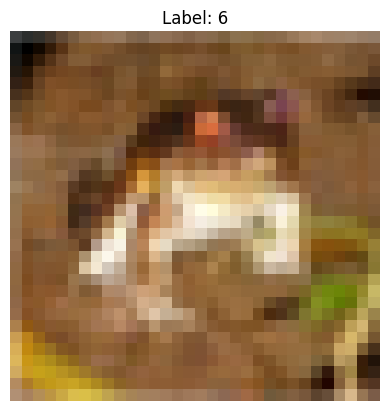

In [ ]:
import matplotlib.pyplot as plt

# Display a sample image and its label
index = 0  # Change the index to view different images
sample_image = data[index]
sample_label = targets[index]

# Display the image
plt.imshow(sample_image)
plt.title(f"Label: {sample_label}")
plt.axis('off')
plt.show()


In [ ]:
import torch
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from scipy.spatial import distance


# Load training data
train_file_path = '/content/drive/MyDrive/dataset/dataset/part_one_dataset/train_data/1_train_data.tar.pth'

# /content/drive/MyDrive/dataset/dataset/part_one_dataset/train_data/1_train_data.tar.pth
# try:
train_data = torch.load(train_file_path)
print("Training data loaded successfully!")
# except Exception as e:
    # print(f"Error loading training data: {e}")

# Prepare training images
train_images = np.array(train_data['data']).astype('float32')
train_targets = np.array(train_data['targets'])

# Preprocess images for DenseNet121
train_images = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in train_images])
train_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in train_images])
train_images_preprocessed = preprocess_input(train_images_resized)

# Load DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Extract features using DenseNet121
train_features = base_model.predict(train_images_preprocessed)

# Calculate class prototypes
class_prototypes = {}
for i, target in enumerate(train_targets):
    if target not in class_prototypes:
        class_prototypes[target] = []
    class_prototypes[target].append(train_features[i])
for target in class_prototypes:
    class_prototypes[target] = np.mean(class_prototypes[target], axis=0)

# Covariance matrix with regularization
lambda_reg = 0.1
covariance_matrix = np.cov(train_features.T) + lambda_reg * np.eye(train_features.shape[1])
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

# Mahalanobis distance and predictions
distances = distance.cdist(train_features, list(class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
y_train_pred = [list(class_prototypes.keys())[i] for i in np.argmin(distances, axis=1)]

# Training accuracy
train_accuracy = np.mean(y_train_pred == train_targets)
print("Training Accuracy with Mahalanobis Distance:", train_accuracy)

# Load evaluation data
eval_file_path = '/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/1_eval_data.tar.pth'
try:
    eval_data = torch.load(eval_file_path)
    print("Evaluation data loaded successfully!")
except Exception as e:
    print(f"Error loading evaluation data: {e}")

# Prepare evaluation images
eval_images = np.array(eval_data['data']).astype('float32')
eval_targets = np.array(eval_data['targets'])
eval_images = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in eval_images])
eval_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in eval_images])
eval_images_preprocessed = preprocess_input(eval_images_resized)

# Extract evaluation features
eval_features = base_model.predict(eval_images_preprocessed)

# Predict evaluation targets
distances_eval = distance.cdist(eval_features, list(class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
y_eval_pred = [list(class_prototypes.keys())[i] for i in np.argmin(distances_eval, axis=1)]

# Evaluation accuracy
eval_accuracy = np.mean(y_eval_pred == eval_targets)
print("Evaluation Accuracy:", eval_accuracy)



<ipython-input-6-3ff881b83c59>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load(train_file_path)


Training data loaded successfully!
79/79 ━━━━━━━━━━━━━━━━━━━━ 454s 6s/step
Training Accuracy with Mahalanobis Distance: 0.9288
Evaluation data loaded successfully!


<ipython-input-6-3ff881b83c59>:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_file_path)


79/79 ━━━━━━━━━━━━━━━━━━━━ 435s 6s/step
Evaluation Accuracy: 0.8572


## first trying on dataset 2

In [ ]:
import numpy as np
import torch
import tensorflow as tf
from scipy.spatial import distance
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

# Function to generate synthetic data points from the class mean and covariance
def generate_synthetic_data(mean, cov, num_samples=100):
    return np.random.multivariate_normal(mean, cov, num_samples)

# Load and preprocess dataset2 (training data)
dataset2_file_path = '/content/drive/MyDrive/dataset/dataset/part_one_dataset/train_data/2_train_data.tar.pth'
dataset2_data = torch.load(dataset2_file_path)
dataset2_images = np.array(dataset2_data['data']).astype('float32')

# Preprocess images for DenseNet121 (resize, repeat channels, and preprocess)
dataset2_images = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in dataset2_images])
dataset2_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in dataset2_images])
dataset2_images_preprocessed = preprocess_input(dataset2_images_resized)

# Load DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Extract features from dataset2
dataset2_features = base_model.predict(dataset2_images_preprocessed)

# Predict classes for dataset2 using the trained Mahalanobis distance method
distances_dataset2 = distance.cdist(dataset2_features, list(class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
y_dataset2_pred = [list(class_prototypes.keys())[i] for i in np.argmin(distances_dataset2, axis=1)]

# Now treat the predicted classes as the true targets for dataset2
dataset2_targets = np.array(y_dataset2_pred)

# Generate synthetic data for each class in dataset2
synthetic_data = {}
for class_label in class_prototypes:
    class_mean = class_prototypes[class_label]
    class_cov = covariance_matrix  # Use the trained covariance matrix for each class
    synthetic_data[class_label] = generate_synthetic_data(class_mean, class_cov, num_samples=100)

# Update class prototypes (mean and covariance) for each class
updated_class_prototypes = {}
for class_label in class_prototypes:
    # Get the predicted points of dataset2 that belong to this class
    class_predicted_points = dataset2_features[np.array(y_dataset2_pred) == class_label]

    # Combine predicted points with synthetic data
    combined_data = np.vstack([class_predicted_points, synthetic_data[class_label]])

    # Calculate new mean and covariance for the class
    updated_class_mean = np.mean(combined_data, axis=0)
    updated_class_cov = np.cov(combined_data.T)

    # Store updated mean and covariance
    updated_class_prototypes[class_label] = updated_class_mean
    covariance_matrix = updated_class_cov  # Update covariance matrix for each class

# Load and preprocess eval_dataset2 (evaluation data)
eval_dataset2_file_path = '/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/2_eval_data.tar.pth'
eval_dataset2_data = torch.load(eval_dataset2_file_path)
eval_dataset2_images = np.array(eval_dataset2_data['data']).astype('float32')
eval_dataset2_targets = np.array(eval_dataset2_data['targets'])

# Preprocess evaluation images
eval_dataset2_images = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in eval_dataset2_images])
eval_dataset2_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in eval_dataset2_images])
eval_dataset2_images_preprocessed = preprocess_input(eval_dataset2_images_resized)

# Extract evaluation features from eval_dataset2
eval_dataset2_features = base_model.predict(eval_dataset2_images_preprocessed)

# Classify using updated class prototypes
distances_eval_dataset2 = distance.cdist(eval_dataset2_features, list(updated_class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
y_eval_dataset2_pred = [list(updated_class_prototypes.keys())[i] for i in np.argmin(distances_eval_dataset2, axis=1)]

# Calculate evaluation accuracy
eval_accuracy = np.mean(y_eval_dataset2_pred == eval_dataset2_targets)
print(f"Evaluation Accuracy for dataset2: {eval_accuracy * 100:.2f}%")


<ipython-input-4-052da3f5d9ee>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset2_data = torch.load(dataset2_file_path)


79/79 ━━━━━━━━━━━━━━━━━━━━ 466s 6s/step


<ipython-input-4-052da3f5d9ee>:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_dataset2_data = torch.load(eval_dataset2_file_path)


79/79 ━━━━━━━━━━━━━━━━━━━━ 430s 5s/step
Evaluation Accuracy for dataset2: 81.84%


In [ ]:
import torch
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input

def load_and_preprocess_data(data_path, model, input_shape, preprocess_fn):
    """
    Load and preprocess data for feature extraction.

    Parameters:
    - data_path (str): Path to the dataset (PyTorch `.tar.pth` file).
    - model (keras.Model): The pre-trained model used for feature extraction.
    - input_shape (tuple): The desired input shape (height, width).
    - preprocess_fn (function): Preprocessing function for the input data.

    Returns:
    - features (numpy.ndarray): Extracted features from the dataset using the model.
    - targets (numpy.ndarray): Labels/targets for the dataset.
    """
    # Load dataset
    data = torch.load(data_path)

    # Extract data and targets
    images = np.array(data['data']).astype('float32')
    targets = np.array(data['targets'])

    # Ensure 3 channels in case of grayscale images
    images = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in images])

    # Resize images to the required input shape for DenseNet121 (224, 224)
    images_resized = np.array([tf.image.resize(img, input_shape) for img in images])

    # Preprocess images using the given preprocessing function (e.g., DenseNet preprocessing)
    images_preprocessed = preprocess_fn(images_resized)

    # Extract features using the model
    features = model.predict(images_preprocessed)

    return features, targets


This code below is without using gpu

In [ ]:
import numpy as np
from scipy.spatial import distance

# Initialize matrix for evaluation accuracies

# Loop over datasets
n_datasets = 10  # Adjust this to the number of datasets

eval_accuracies = np.zeros((n_datasets, n_datasets))
eval_accuracies[0][0]=85.72
input_shape = (224, 224)

for i in range(2, n_datasets + 1):
    print(f"Processing Dataset {i}...")

    # Load Dataset i
    dataset_i_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/train_data/{i}_train_data.tar.pth'
    # features_i, _ = load_and_preprocess_data(dataset_i_path, base_model, input_shape, preprocess_input)

    dataset_i_data = torch.load(dataset_i_path)
    dataset_i_images = np.array(dataset_i_data['data']).astype('float32')

    # Preprocess images for DenseNet121 (resize, repeat channels, and preprocess)
    dataset_i_images = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in dataset_i_images])
    dataset_i_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in dataset_i_images])
    dataset_i_images_preprocessed = preprocess_input(dataset_i_images_resized)

    # Load DenseNet121 model
    base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

    # Extract features from dataseti
    features_i = base_model.predict(dataset_i_images_preprocessed)

    # Predict labels using the current model
    distances_i = distance.cdist(features_i, list(class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
    predicted_labels_i = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_i, axis=1)]

    # Generate synthetic data for each class
    synthetic_features = []
    synthetic_labels = []
    for class_label in class_prototypes.keys():
        mean = class_prototypes[class_label]
        cov = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])  # Regularize covariance matrix
        synthetic_data = np.random.multivariate_normal(mean, cov, size=100)
        synthetic_features.append(synthetic_data)
        synthetic_labels.extend([class_label] * 100)

    # Combine synthetic and dataset_i features
    combined_features = np.vstack([features_i, *synthetic_features])
    combined_labels = np.hstack([predicted_labels_i, synthetic_labels])

    # Update class prototypes and covariance matrix
    new_prototypes = {}
    for class_label in np.unique(combined_labels):
        class_features = combined_features[combined_labels == class_label]
        new_prototypes[class_label] = np.mean(class_features, axis=0)
    new_covariance_matrix = np.cov(combined_features.T)

    # **Update the current prototypes and covariance matrix**
    class_prototypes = new_prototypes
    covariance_matrix = new_covariance_matrix

    # Evaluate on all past evaluation datasets and store accuracies
    for j in range(1, i + 1):
        eval_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/{j}_eval_data.tar.pth'
        # eval_features, eval_targets = load_and_preprocess_data(eval_path, base_model, input_shape, preprocess_input)

        try:
            eval_data = torch.load(eval_path)
            print("Evaluation data loaded successfully!")
        except Exception as e:
            print(f"Error loading evaluation data: {e}")

        # Prepare evaluation images
        eval_images = np.array(eval_data['data']).astype('float32')
        eval_targets = np.array(eval_data['targets'])
        eval_images = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in eval_images])
        eval_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in eval_images])
        eval_images_preprocessed = preprocess_input(eval_images_resized)

        # Extract evaluation features
        eval_features = base_model.predict(eval_images_preprocessed)

        # Predict using the updated model
        distances_eval = distance.cdist(eval_features, list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
        eval_predictions = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_eval, axis=1)]

        # Calculate accuracy if targets are available
        if eval_targets is not None:
            eval_accuracy = np.mean(eval_predictions == eval_targets)
            eval_accuracies[i-1, j-1] = eval_accuracy * 100  # Store accuracy in matrix (in percentage)
            print(f"Evaluation Accuracy on Dataset {j}: {eval_accuracy * 100:.2f}%")
        else:
            eval_accuracies[i-1, j-1] = 0  # Set to 0 if no targets are available
            print(f"Predictions on Dataset {j}: {eval_predictions[:10]} (first 10 predictions)")

# Now eval_accuracies contains the evaluation accuracies for all datasets
print("Evaluation Accuracy Matrix:")
print(eval_accuracies)


Processing Dataset 2...


<ipython-input-11-10e9c1e4c465>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_i_data = torch.load(dataset_i_path)


This is with using gpu

In [ ]:
import torch
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from scipy.spatial import distance

# Verify GPU availability
print("Is GPU available (TensorFlow)?", tf.config.list_physical_devices('GPU'))
print("Is GPU available (PyTorch)?", torch.cuda.is_available())

# Paths to data
train_file_path = '/content/drive/MyDrive/dataset/dataset/part_one_dataset/train_data/1_train_data.tar.pth'
eval_file_path = '/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/1_eval_data.tar.pth'

# Load training data
train_data = torch.load(train_file_path)
print("Training data loaded successfully!")

# Convert training images and targets to GPU tensors
train_images = torch.tensor(train_data['data'], dtype=torch.float32).cuda()
train_targets = torch.tensor(train_data['targets']).cuda()

# Prepare training images for DenseNet121
train_images_np = train_images.cpu().numpy()  # Convert to NumPy for TensorFlow processing
train_images_np = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in train_images_np])
train_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in train_images_np])
train_images_preprocessed = preprocess_input(train_images_resized)

# Load DenseNet121 model
base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Extract features using DenseNet121
train_features = base_model.predict(train_images_preprocessed)
train_features = torch.tensor(train_features).cuda()  # Convert to GPU tensor

# Calculate class prototypes
class_prototypes = {}
for i, target in enumerate(train_targets.cpu().numpy()):
    if target not in class_prototypes:
        class_prototypes[target] = []
    class_prototypes[target].append(train_features[i].cpu().numpy())
for target in class_prototypes:
    class_prototypes[target] = np.mean(class_prototypes[target], axis=0)

# Covariance matrix with regularization
lambda_reg = 0.1
covariance_matrix = np.cov(train_features.cpu().numpy().T) + lambda_reg * np.eye(train_features.shape[1])
inv_covariance_matrix = np.linalg.inv(covariance_matrix)

# Mahalanobis distance and predictions
distances = distance.cdist(train_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
y_train_pred = [list(class_prototypes.keys())[i] for i in np.argmin(distances, axis=1)]

# Training accuracy
train_accuracy = np.mean(y_train_pred == train_targets.cpu().numpy())
print("Training Accuracy with Mahalanobis Distance:", train_accuracy)

# Load evaluation data
eval_data = torch.load(eval_file_path)
print("Evaluation data loaded successfully!")

# Prepare evaluation images
eval_images = torch.tensor(eval_data['data'], dtype=torch.float32).cuda()
eval_targets = torch.tensor(eval_data['targets']).cuda()
eval_images_np = eval_images.cpu().numpy()
eval_images_np = np.stack([np.repeat(img[..., np.newaxis], 3, axis=-1) if img.ndim == 2 else img for img in eval_images_np])
eval_images_resized = np.array([tf.image.resize(img, (224, 224)) for img in eval_images_np])
eval_images_preprocessed = preprocess_input(eval_images_resized)

# Extract evaluation features
eval_features = base_model.predict(eval_images_preprocessed)
eval_features = torch.tensor(eval_features).cuda()

# Predict evaluation targets
distances_eval = distance.cdist(eval_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
y_eval_pred = [list(class_prototypes.keys())[i] for i in np.argmin(distances_eval, axis=1)]

# Evaluation accuracy
eval_accuracy = np.mean(y_eval_pred == eval_targets.cpu().numpy())
print("Evaluation Accuracy:", eval_accuracy)


Is GPU available (TensorFlow)? [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Is GPU available (PyTorch)? True
Training data loaded successfully!


<ipython-input-3-d1f6404c76ac>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load(train_file_path)


79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 238ms/step
Training Accuracy with Mahalanobis Distance: 0.9288
Evaluation data loaded successfully!


<ipython-input-3-d1f6404c76ac>:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_file_path)


79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step
Evaluation Accuracy: 0.8572


## code for the evaluation matrix

In [ ]:
import numpy as np
import torch
import tensorflow as tf
from scipy.spatial import distance
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

# Initialize matrix for evaluation accuracies
n_datasets = 10  # Adjust this to the number of datasets
eval_accuracies = np.zeros((n_datasets, n_datasets))
eval_accuracies[0][0] = 85.72
input_shape = (224, 224)
batch_size = 32  # Process images in small batches

# Load DenseNet121 model on GPU
base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Function to preprocess images in batches
def preprocess_images_in_batches(images, batch_size, input_shape):
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size]
        batch_resized = np.array([tf.image.resize(img, input_shape) for img in batch_images])
        yield preprocess_input(batch_resized)

# Loop over datasets
for i in range(2, n_datasets + 1):
    print(f"Processing Dataset {i}...")

    # Load Dataset i
    dataset_i_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/train_data/{i}_train_data.tar.pth'
    dataset_i_data = torch.load(dataset_i_path)

    # Move dataset to GPU
    dataset_i_images = np.array(dataset_i_data['data']).astype('float32')

    # Extract features in batches
    features_i = []
    for batch in preprocess_images_in_batches(dataset_i_images, batch_size, input_shape):
        with tf.device('/GPU:0'):
            batch_features = base_model.predict(batch)
        features_i.append(batch_features)

    features_i = np.vstack(features_i)  # Combine batches
    features_i = torch.tensor(features_i).cuda()  # Move to GPU

    # Predictions using the previous model
    distances_i = distance.cdist(features_i.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=inv_covariance_matrix)
    predicted_labels_i = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_i, axis=1)]

    # Generate synthetic data for each class
    synthetic_features = []
    synthetic_labels = []
    for class_label in class_prototypes.keys():
        mean = class_prototypes[class_label]
        cov = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])  # Regularize covariance matrix
        synthetic_data = np.random.multivariate_normal(mean, cov, size=100)
        synthetic_features.append(synthetic_data)
        synthetic_labels.extend([class_label] * 100)

    # Combine synthetic and dataset_i features
    combined_features = np.vstack([features_i.cpu().numpy(), *synthetic_features])
    combined_labels = np.hstack([predicted_labels_i, synthetic_labels])

    # Update class prototypes and covariance matrix
    new_prototypes = {}
    for class_label in np.unique(combined_labels):
        class_features = combined_features[combined_labels == class_label]
        new_prototypes[class_label] = np.mean(class_features, axis=0)
    new_covariance_matrix = np.cov(combined_features.T)

    # Update the current prototypes and covariance matrix
    class_prototypes = new_prototypes
    covariance_matrix = new_covariance_matrix

    # Clear memory
    del dataset_i_images, features_i
    torch.cuda.empty_cache()

    # Evaluate on all past evaluation datasets and store accuracies
    for j in range(1, i + 1):
        eval_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/{j}_eval_data.tar.pth'
        eval_data = torch.load(eval_path)

        # Prepare evaluation images
        eval_images = np.array(eval_data['data']).astype('float32')
        eval_images_np = eval_images

        # Extract evaluation features in batches
        eval_features = []
        for batch in preprocess_images_in_batches(eval_images_np, batch_size, input_shape):
            with tf.device('/GPU:0'):
                batch_features = base_model.predict(batch)
            eval_features.append(batch_features)

        eval_features = np.vstack(eval_features)
        eval_features = torch.tensor(eval_features).cuda()

        # Predict using the updated model
        distances_eval = distance.cdist(eval_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
        eval_predictions = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_eval, axis=1)]

        # Store accuracy
        eval_accuracy = np.mean(eval_predictions == np.array(eval_data['targets']))
        eval_accuracies[i-1, j-1] = eval_accuracy * 100  # Store accuracy in matrix

        # Clear memory
        del eval_images, eval_features
        torch.cuda.empty_cache()

print("Evaluation Accuracy Matrix:")
print(eval_accuracies)


Processing Dataset 2...


<ipython-input-4-3cd6b601b35e>:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_i_data = torch.load(dataset_i_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━

<ipython-input-4-3cd6b601b35e>:81: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [ ]:
import json

# Paths for saving
prototypes_path = '/content/class_prototypes.json'
covariance_path = '/content/covariance_matrix.npy'

# Save class prototypes (means)
with open(prototypes_path, 'w') as f:
    json.dump({str(k): v.tolist() for k, v in class_prototypes.items()}, f)

# Save covariance matrix
np.save(covariance_path, covariance_matrix)

print("Class prototypes and covariance matrix saved!")


Class prototypes and covariance matrix saved!


# TASK 2

In [ ]:
import json
import numpy as np
# Paths for saving
prototypes_path = '/content/class_prototypes.json'
covariance_path = '/content/covariance_matrix.npy'
# Load class prototypes (means)
with open(prototypes_path, 'r') as f:
    class_prototypes = {int(k): np.array(v) for k, v in json.load(f).items()}

# Load covariance matrix
covariance_matrix = np.load(covariance_path)
inv_covariance_matrix = np.linalg.inv(covariance_matrix)
print("Class prototypes and covariance matrix loaded!")


Class prototypes and covariance matrix loaded!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
eval_accuracies = np.zeros((10, 20))

In [ ]:
import numpy as np
import torch
import tensorflow as tf
from scipy.spatial import distance
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input

# Initialize matrix for evaluation accuracies
n_datasets = 10  # Adjust this to the number of datasets

# eval_accuracies[0][0] = 85.72
input_shape = (224, 224)
batch_size = 32  # Process images in small batches

# Load DenseNet121 model on GPU
base_model = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Function to preprocess images in batches
def preprocess_images_in_batches(images, batch_size, input_shape):
    for i in range(0, len(images), batch_size):
        batch_images = images[i:i + batch_size]
        batch_resized = np.array([tf.image.resize(img, input_shape) for img in batch_images])
        yield preprocess_input(batch_resized)

# Loop over datasets
for i in range(11, 12 + 1):
    print(f"Processing Dataset {i}...")

    # Load Dataset i
    dataset_i_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/train_data/{i-10}_train_data.tar.pth'
    dataset_i_data = torch.load(dataset_i_path)

    # Move dataset to GPU
    dataset_i_images = np.array(dataset_i_data['data']).astype('float32')

    # Extract features in batches
    features_i = []
    for batch in preprocess_images_in_batches(dataset_i_images, batch_size, input_shape):
        with tf.device('/GPU:0'):
            batch_features = base_model.predict(batch)
        features_i.append(batch_features)

    features_i = np.vstack(features_i)  # Combine batches
    features_i = torch.tensor(features_i).cuda()  # Move to GPU

    # Predictions using the previous model
    distances_i = distance.cdist(features_i.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
    predicted_labels_i = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_i, axis=1)]

    # Generate synthetic data for each class
    synthetic_features = []
    synthetic_labels = []
    for class_label in class_prototypes.keys():
        mean = class_prototypes[class_label]
        cov = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])  # Regularize covariance matrix
        synthetic_data = np.random.multivariate_normal(mean, cov, size=100)
        synthetic_features.append(synthetic_data)
        synthetic_labels.extend([class_label] * 100)

    # Combine synthetic and dataset_i features
    combined_features = np.vstack([features_i.cpu().numpy(), *synthetic_features])
    combined_labels = np.hstack([predicted_labels_i, synthetic_labels])

    # Update class prototypes and covariance matrix
    new_prototypes = {}
    for class_label in np.unique(combined_labels):
        class_features = combined_features[combined_labels == class_label]
        new_prototypes[class_label] = np.mean(class_features, axis=0)
    new_covariance_matrix = np.cov(combined_features.T)

    # Update the current prototypes and covariance matrix
    class_prototypes = new_prototypes
    covariance_matrix = new_covariance_matrix

    # Clear memory
    del dataset_i_images, features_i
    torch.cuda.empty_cache()

    # Evaluate on all past evaluation datasets and store accuracies
    for j in range(1, i + 1):
        if (j<=10):
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/{j}_eval_data.tar.pth'
        else:
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/eval_data/{j-10}_eval_data.tar.pth'

        eval_data = torch.load(eval_path)

        # Prepare evaluation images
        eval_images = np.array(eval_data['data']).astype('float32')
        eval_images_np = eval_images

        # Extract evaluation features in batches
        eval_features = []
        for batch in preprocess_images_in_batches(eval_images_np, batch_size, input_shape):
            with tf.device('/GPU:0'):
                batch_features = base_model.predict(batch)
            eval_features.append(batch_features)

        eval_features = np.vstack(eval_features)
        eval_features = torch.tensor(eval_features).cuda()

        # Predict using the updated model
        distances_eval = distance.cdist(eval_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
        eval_predictions = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_eval, axis=1)]

        # Store accuracy
        eval_accuracy = np.mean(eval_predictions == np.array(eval_data['targets']))
        eval_accuracies[i-10-1, j-1] = eval_accuracy * 100  # Store accuracy in matrix

        # Clear memory
        del eval_images, eval_features
        torch.cuda.empty_cache()

print("Evaluation Accuracy Matrix:")
print(eval_accuracies)


Processing Dataset 11...


<ipython-input-19-8a8b9433b2e1>:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_i_data = torch.load(dataset_i_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━

<ipython-input-19-8a8b9433b2e1>:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [ ]:
for i in range(13, 14 + 1):
    print(f"Processing Dataset {i}...")

    # Load Dataset i
    dataset_i_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/train_data/{i-10}_train_data.tar.pth'
    dataset_i_data = torch.load(dataset_i_path)

    # Move dataset to GPU
    dataset_i_images = np.array(dataset_i_data['data']).astype('float32')

    # Extract features in batches
    features_i = []
    for batch in preprocess_images_in_batches(dataset_i_images, batch_size, input_shape):
        with tf.device('/GPU:0'):
            batch_features = base_model.predict(batch)
        features_i.append(batch_features)

    features_i = np.vstack(features_i)  # Combine batches
    features_i = torch.tensor(features_i).cuda()  # Move to GPU

    # Predictions using the previous model
    distances_i = distance.cdist(features_i.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
    predicted_labels_i = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_i, axis=1)]

    # Generate synthetic data for each class
    synthetic_features = []
    synthetic_labels = []
    for class_label in class_prototypes.keys():
        mean = class_prototypes[class_label]
        cov = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])  # Regularize covariance matrix
        synthetic_data = np.random.multivariate_normal(mean, cov, size=100)
        synthetic_features.append(synthetic_data)
        synthetic_labels.extend([class_label] * 100)

    # Combine synthetic and dataset_i features
    combined_features = np.vstack([features_i.cpu().numpy(), *synthetic_features])
    combined_labels = np.hstack([predicted_labels_i, synthetic_labels])

    # Update class prototypes and covariance matrix
    new_prototypes = {}
    for class_label in np.unique(combined_labels):
        class_features = combined_features[combined_labels == class_label]
        new_prototypes[class_label] = np.mean(class_features, axis=0)
    new_covariance_matrix = np.cov(combined_features.T)

    # Update the current prototypes and covariance matrix
    class_prototypes = new_prototypes
    covariance_matrix = new_covariance_matrix

    # Clear memory
    del dataset_i_images, features_i
    torch.cuda.empty_cache()

    # Evaluate on all past evaluation datasets and store accuracies
    for j in range(1, i + 1):
        if (j<=10):
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/{j}_eval_data.tar.pth'
        else:
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/eval_data/{j-10}_eval_data.tar.pth'

        eval_data = torch.load(eval_path)

        # Prepare evaluation images
        eval_images = np.array(eval_data['data']).astype('float32')
        eval_images_np = eval_images

        # Extract evaluation features in batches
        eval_features = []
        for batch in preprocess_images_in_batches(eval_images_np, batch_size, input_shape):
            with tf.device('/GPU:0'):
                batch_features = base_model.predict(batch)
            eval_features.append(batch_features)

        eval_features = np.vstack(eval_features)
        eval_features = torch.tensor(eval_features).cuda()

        # Predict using the updated model
        distances_eval = distance.cdist(eval_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
        eval_predictions = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_eval, axis=1)]

        # Store accuracy
        eval_accuracy = np.mean(eval_predictions == np.array(eval_data['targets']))
        eval_accuracies[i-10-1, j-1] = eval_accuracy * 100  # Store accuracy in matrix

        # Clear memory
        del eval_images, eval_features
        torch.cuda.empty_cache()


print("Evaluation Accuracy Matrix:")
print(eval_accuracies)


Processing Dataset 13...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<ipython-input-20-7a34314992da>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_i_data = torch.load(dataset_i_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

<ipython-input-20-7a34314992da>:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [ ]:
for i in range(15, 16 + 1):
    print(f"Processing Dataset {i}...")

    # Load Dataset i
    dataset_i_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/train_data/{i-10}_train_data.tar.pth'
    dataset_i_data = torch.load(dataset_i_path)

    # Move dataset to GPU
    dataset_i_images = np.array(dataset_i_data['data']).astype('float32')

    # Extract features in batches
    features_i = []
    for batch in preprocess_images_in_batches(dataset_i_images, batch_size, input_shape):
        with tf.device('/GPU:0'):
            batch_features = base_model.predict(batch)
        features_i.append(batch_features)

    features_i = np.vstack(features_i)  # Combine batches
    features_i = torch.tensor(features_i).cuda()  # Move to GPU

    # Predictions using the previous model
    distances_i = distance.cdist(features_i.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
    predicted_labels_i = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_i, axis=1)]

    # Generate synthetic data for each class
    synthetic_features = []
    synthetic_labels = []
    for class_label in class_prototypes.keys():
        mean = class_prototypes[class_label]
        cov = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])  # Regularize covariance matrix
        synthetic_data = np.random.multivariate_normal(mean, cov, size=100)
        synthetic_features.append(synthetic_data)
        synthetic_labels.extend([class_label] * 100)

    # Combine synthetic and dataset_i features
    combined_features = np.vstack([features_i.cpu().numpy(), *synthetic_features])
    combined_labels = np.hstack([predicted_labels_i, synthetic_labels])

    # Update class prototypes and covariance matrix
    new_prototypes = {}
    for class_label in np.unique(combined_labels):
        class_features = combined_features[combined_labels == class_label]
        new_prototypes[class_label] = np.mean(class_features, axis=0)
    new_covariance_matrix = np.cov(combined_features.T)

    # Update the current prototypes and covariance matrix
    class_prototypes = new_prototypes
    covariance_matrix = new_covariance_matrix

    # Clear memory
    del dataset_i_images, features_i
    torch.cuda.empty_cache()

    # Evaluate on all past evaluation datasets and store accuracies
    for j in range(1, i + 1):
        if (j<=10):
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/{j}_eval_data.tar.pth'
        else:
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/eval_data/{j-10}_eval_data.tar.pth'

        eval_data = torch.load(eval_path)

        # Prepare evaluation images
        eval_images = np.array(eval_data['data']).astype('float32')
        eval_images_np = eval_images

        # Extract evaluation features in batches
        eval_features = []
        for batch in preprocess_images_in_batches(eval_images_np, batch_size, input_shape):
            with tf.device('/GPU:0'):
                batch_features = base_model.predict(batch)
            eval_features.append(batch_features)

        eval_features = np.vstack(eval_features)
        eval_features = torch.tensor(eval_features).cuda()

        # Predict using the updated model
        distances_eval = distance.cdist(eval_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
        eval_predictions = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_eval, axis=1)]

        # Store accuracy
        eval_accuracy = np.mean(eval_predictions == np.array(eval_data['targets']))
        eval_accuracies[i-10-1, j-1] = eval_accuracy * 100  # Store accuracy in matrix

        # Clear memory
        del eval_images, eval_features
        torch.cuda.empty_cache()


print("Evaluation Accuracy Matrix:")
print(eval_accuracies)


Processing Dataset 15...


<ipython-input-21-d745fb767ab2>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_i_data = torch.load(dataset_i_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

<ipython-input-21-d745fb767ab2>:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [ ]:
for i in range(17, 18 + 1):
    print(f"Processing Dataset {i}...")

    # Load Dataset i
    dataset_i_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/train_data/{i-10}_train_data.tar.pth'
    dataset_i_data = torch.load(dataset_i_path)

    # Move dataset to GPU
    dataset_i_images = np.array(dataset_i_data['data']).astype('float32')

    # Extract features in batches
    features_i = []
    for batch in preprocess_images_in_batches(dataset_i_images, batch_size, input_shape):
        with tf.device('/GPU:0'):
            batch_features = base_model.predict(batch)
        features_i.append(batch_features)

    features_i = np.vstack(features_i)  # Combine batches
    features_i = torch.tensor(features_i).cuda()  # Move to GPU

    # Predictions using the previous model
    distances_i = distance.cdist(features_i.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
    predicted_labels_i = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_i, axis=1)]

    # Generate synthetic data for each class
    synthetic_features = []
    synthetic_labels = []
    for class_label in class_prototypes.keys():
        mean = class_prototypes[class_label]
        cov = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])  # Regularize covariance matrix
        synthetic_data = np.random.multivariate_normal(mean, cov, size=100)
        synthetic_features.append(synthetic_data)
        synthetic_labels.extend([class_label] * 100)

    # Combine synthetic and dataset_i features
    combined_features = np.vstack([features_i.cpu().numpy(), *synthetic_features])
    combined_labels = np.hstack([predicted_labels_i, synthetic_labels])

    # Update class prototypes and covariance matrix
    new_prototypes = {}
    for class_label in np.unique(combined_labels):
        class_features = combined_features[combined_labels == class_label]
        new_prototypes[class_label] = np.mean(class_features, axis=0)
    new_covariance_matrix = np.cov(combined_features.T)

    # Update the current prototypes and covariance matrix
    class_prototypes = new_prototypes
    covariance_matrix = new_covariance_matrix

    # Clear memory
    del dataset_i_images, features_i
    torch.cuda.empty_cache()

    # Evaluate on all past evaluation datasets and store accuracies
    for j in range(1, i + 1):
        if (j<=10):
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/{j}_eval_data.tar.pth'
        else:
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/eval_data/{j-10}_eval_data.tar.pth'

        eval_data = torch.load(eval_path)

        # Prepare evaluation images
        eval_images = np.array(eval_data['data']).astype('float32')
        eval_images_np = eval_images

        # Extract evaluation features in batches
        eval_features = []
        for batch in preprocess_images_in_batches(eval_images_np, batch_size, input_shape):
            with tf.device('/GPU:0'):
                batch_features = base_model.predict(batch)
            eval_features.append(batch_features)

        eval_features = np.vstack(eval_features)
        eval_features = torch.tensor(eval_features).cuda()

        # Predict using the updated model
        distances_eval = distance.cdist(eval_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
        eval_predictions = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_eval, axis=1)]

        # Store accuracy
        eval_accuracy = np.mean(eval_predictions == np.array(eval_data['targets']))
        eval_accuracies[i-1-10, j-1] = eval_accuracy * 100  # Store accuracy in matrix

        # Clear memory
        del eval_images, eval_features
        torch.cuda.empty_cache()


print("Evaluation Accuracy Matrix:")
print(eval_accuracies)


Processing Dataset 17...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<ipython-input-22-4dc8424bdcbc>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_i_data = torch.load(dataset_i_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

<ipython-input-22-4dc8424bdcbc>:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

In [ ]:
for i in range(19, 20 + 1):
    print(f"Processing Dataset {i}...")

    # Load Dataset i
    dataset_i_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/train_data/{i-10}_train_data.tar.pth'
    dataset_i_data = torch.load(dataset_i_path)

    # Move dataset to GPU
    dataset_i_images = np.array(dataset_i_data['data']).astype('float32')

    # Extract features in batches
    features_i = []
    for batch in preprocess_images_in_batches(dataset_i_images, batch_size, input_shape):
        with tf.device('/GPU:0'):
            batch_features = base_model.predict(batch)
        features_i.append(batch_features)

    features_i = np.vstack(features_i)  # Combine batches
    features_i = torch.tensor(features_i).cuda()  # Move to GPU

    # Predictions using the previous model
    distances_i = distance.cdist(features_i.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
    predicted_labels_i = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_i, axis=1)]

    # Generate synthetic data for each class
    synthetic_features = []
    synthetic_labels = []
    for class_label in class_prototypes.keys():
        mean = class_prototypes[class_label]
        cov = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])  # Regularize covariance matrix
        synthetic_data = np.random.multivariate_normal(mean, cov, size=100)
        synthetic_features.append(synthetic_data)
        synthetic_labels.extend([class_label] * 100)

    # Combine synthetic and dataset_i features
    combined_features = np.vstack([features_i.cpu().numpy(), *synthetic_features])
    combined_labels = np.hstack([predicted_labels_i, synthetic_labels])

    # Update class prototypes and covariance matrix
    new_prototypes = {}
    for class_label in np.unique(combined_labels):
        class_features = combined_features[combined_labels == class_label]
        new_prototypes[class_label] = np.mean(class_features, axis=0)
    new_covariance_matrix = np.cov(combined_features.T)

    # Update the current prototypes and covariance matrix
    class_prototypes = new_prototypes
    covariance_matrix = new_covariance_matrix

    # Clear memory
    del dataset_i_images, features_i
    torch.cuda.empty_cache()

    # Evaluate on all past evaluation datasets and store accuracies
    for j in range(1, i + 1):
        if (j<=10):
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_one_dataset/eval_data/{j}_eval_data.tar.pth'
        else:
          eval_path = f'/content/drive/MyDrive/dataset/dataset/part_two_dataset/eval_data/{j-10}_eval_data.tar.pth'

        eval_data = torch.load(eval_path)

        # Prepare evaluation images
        eval_images = np.array(eval_data['data']).astype('float32')
        eval_images_np = eval_images

        # Extract evaluation features in batches
        eval_features = []
        for batch in preprocess_images_in_batches(eval_images_np, batch_size, input_shape):
            with tf.device('/GPU:0'):
                batch_features = base_model.predict(batch)
            eval_features.append(batch_features)

        eval_features = np.vstack(eval_features)
        eval_features = torch.tensor(eval_features).cuda()

        # Predict using the updated model
        distances_eval = distance.cdist(eval_features.cpu().numpy(), list(class_prototypes.values()), metric='mahalanobis', VI=np.linalg.inv(covariance_matrix))
        eval_predictions = [list(class_prototypes.keys())[idx] for idx in np.argmin(distances_eval, axis=1)]

        # Store accuracy
        eval_accuracy = np.mean(eval_predictions == np.array(eval_data['targets']))
        eval_accuracies[i-1-10, j-1] = eval_accuracy * 100  # Store accuracy in matrix

        # Clear memory
        del eval_images, eval_features
        torch.cuda.empty_cache()


print("Evaluation Accuracy Matrix:")
print(eval_accuracies)


Processing Dataset 19...


<ipython-input-23-476dd4a6f6a8>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dataset_i_data = torch.load(dataset_i_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━

<ipython-input-23-476dd4a6f6a8>:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  eval_data = torch.load(eval_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [ ]:
import pandas as pd
eval_accuracies = pd.DataFrame(eval_accuracies)

print("Evaluation Accuracy Matrix:")
print(eval_accuracies)

Evaluation Accuracy Matrix:
      0      1      2      3      4      5      6      7      8      9   \
0  63.84  65.72  63.92  64.64  65.40  64.68  65.68  64.16  62.64  65.24   
1  51.28  52.68  53.44  53.60  54.04  52.68  53.00  51.92  51.16  53.92   
2  55.92  55.96  57.28  55.76  58.16  55.96  56.00  54.72  53.08  56.48   
3  58.72  58.40  57.44  57.04  59.84  57.96  58.12  57.16  55.76  58.52   
4  58.32  61.76  59.16  59.24  60.80  59.88  58.80  58.72  56.96  59.40   
5  53.44  56.40  54.56  53.68  56.08  53.88  53.56  53.68  52.32  54.04   
6  55.44  56.64  56.12  55.52  57.48  56.72  55.00  54.52  53.84  55.88   
7  54.60  57.16  54.00  52.40  57.20  55.20  54.44  54.52  54.00  54.96   
8  48.12  48.52  48.44  48.48  50.36  48.36  48.80  48.68  46.24  51.24   
9  50.68  52.64  51.80  50.88  52.68  50.16  49.56  50.32  48.80  51.96   

      10     11     12     13     14     15     16     17     18     19  
0  46.80   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00 